In [5]:
# Basisc square wave: SX-->T1;  flat band --> T2;  T1 + T2 = T
from scipy.special import jn_zeros
from itertools import combinations


def zerodrive(t, args):
    d = args['duty']
    w = args['omega']
    T = 2 * np.pi/w
    sqr = -signal.square(w * t, duty = d)
    if sqr < 0:
        sqr= 0
    return sqr

def onedrive(t, args):
    d = args['duty']
    w = args['omega']
    T = 2 * np.pi/w
    sqr = signal.square(w * t, duty = d)
    if sqr < 0:
        sqr= 0
    return sqr

def drive1(t, args):
    d = args['duty']
    w = args['omega']
    J = args['J']
    T = 2 * np.pi/w
    sqr = J * signal.square(w * t, duty = d)
    return sqr

def drive2(t, args):
    d = args['duty']
    w = args['omega']
    g = args['g']
    T = 2 * np.pi/w
    sqr = g * signal.square(2 * w * t, duty = d)
    return sqr

def drive3(t, args):
    d = args['duty']
    w = args['omega']
    lambda_s = args['lambda_s']
    T = 2 * np.pi/w
    sqr = - lambda_s * signal.square(w * t, duty = d) 
    if sqr < 0:
        sqr= 0
    return sqr


# HAMILTONIAN   

def j_ij(Jvalue, i,j, beta):
    return Jvalue/(np.abs(i-j))**beta
 
def position_hamiltonian(args):
    N  =  args['N']
    er = args['er']
    sx,sy,sz = sigmax(), sigmay(), sigmaz()
    empt = qzero(2**N) + 1j * qzero(2**N)    
    H01, H02, H11, H31 = empt,  empt, empt, empt
    
    for i in range(N-1):
        id = qeye(2**i)    
        dim11 = N-2-i
        id1 = qeye(2**dim11)
        H01 = H01 + Qobj(tensor(id,tensor(sz,tensor(sz,id1))).full())

    for i in range(N):
        id = qeye(2 ** i)    
        dim11 = N-1-i
        id1 = qeye(2 ** dim11)
        H02 = H02 + Qobj(tensor(id,tensor(sx,id1)).full())
        
    for i in range(N):
        id = qeye(2**i)    
        dim11 = N-1-i
        id1 = qeye(2**dim11)
        H11 = H11 + Qobj(tensor(id,tensor(sx,id1)).full()) * (1-er)
        
        
    for i in range(N):
        id = qeye(2**i)    
        dim11 = N-1-i
        id1 = qeye(2**dim11)
        H31 = H31 + Qobj(tensor(id,tensor(sz,id1)).full())

    return H01, H02, H11, H31

# FLOQUET ANALYSIS

def floquet_return_position(args):
    N  =  args['N']
    er = args['er']
    H01, H02, H11, H31 = position_hamiltonian(args)
    #H = [[H01, drive1],[H02,drive2],[H11,drive3]]
    H = [[H01, drive1],[H02,drive2]]

    T = 2 * np.pi/args['omega']
    f_modes_0, f_energies = floquet_modes(H, T, args)
    return f_energies

# MAGNETIZATION
def magnetization_position(args):      
    N  =  args['N']
    er = args['er']
    H01, H02, H11, H31 = position_hamiltonian(args)
    H = [[H01, drive1],[H02,drive2],[H11,drive3]]

    grket = basis(2**N,0)
    times = args['times']
    data = mesolve(H, grket, times, [], [H31/N], args = args)
    return data.expect

print("Functions defined")

Functions defined


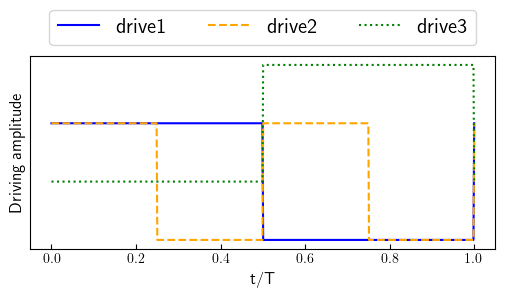

In [18]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.special import jn_zeros


plt.rcParams.update({"figure.figsize": (6, 2.5), "text.usetex": True, "font.size": 20})

w = 4
T = 2 * np.pi/w
h = jn_zeros(0,1)[0] * w/4
times = np.linspace(0, 1*T, 600)
duty = 0.5

J = 1
g = 1

params = {'omega': w, 'duty': duty, 'lambda_s': w/2, 'lambda_0': h,\
    'omega_0': 0, 'omega_1': 0.5, 'h':h, 'J': J , 'g': g}  

plt.plot(times/T, np.array([drive1(t, params) for t in times]), color = 'blue', label = r'drive1')
plt.plot(times/T, np.array([drive2(t, params) for t in times]), color = 'orange', label = r'drive2', ls= '--')
plt.plot(times/T, np.array([drive3(t, params) for t in times]), color = 'green', label = r'drive3', ls= ':')

plt.tick_params(axis='both', which='both', labelsize=10)
plt.xlabel('t/T', fontsize = 12)
plt.ylabel(r'Driving amplitude', fontsize = 12)
plt.tick_params(which='both', direction='in')
plt.legend(frameon = True,  fontsize =15, ncol =3, loc = 'center', bbox_to_anchor = (0.5, 1.15))
plt.yticks([])
#plt.ylim(-1.1, 1.6)
#plt.savefig("ising_freezing_dtc_drive.pdf", bbox_inches = 'tight')

plt.show()

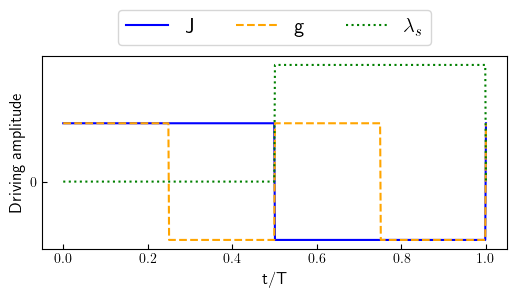

In [4]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.special import jn_zeros


plt.rcParams.update({"figure.figsize": (6, 2.5), "text.usetex": True, "font.size": 20})

w = 4
T = 2 * np.pi/w
h = jn_zeros(0,1)[0] * w/4
times = np.linspace(0, 1*T, 600)
duty = 0.5

J = 1
g = 1

params = {'omega': w, 'duty': duty, 'lambda_s': w/2, 'lambda_0': h,\
    'omega_0': 0, 'omega_1': 0.5, 'h':h, 'J': J , 'g': g}  

plt.plot(times/T, np.array([drive1(t, params) for t in times]), color = 'blue', label = r'J')
plt.plot(times/T, np.array([drive2(t, params) for t in times]), color = 'orange', label = r'g', ls= '--')
plt.plot(times/T, np.array([drive3(t, params) for t in times]), color = 'green', label = r'$\lambda_s$', ls= ':')

plt.tick_params(axis='both', which='both', labelsize=10)
plt.xlabel('t/T', fontsize = 12)
plt.ylabel(r'Driving amplitude', fontsize = 12)
plt.tick_params(which='both', direction='in')
plt.legend(frameon = True,  fontsize =15, ncol =3, loc = 'center', bbox_to_anchor = (0.5, 1.15))
plt.yticks([0])
#plt.ylim(-1.1, 1.6)
plt.savefig("drive.pdf", bbox_inches = 'tight')

plt.show()

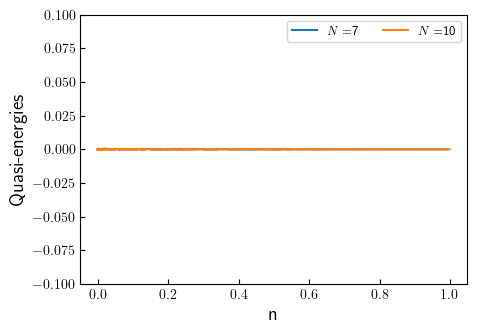

In [8]:
import matplotlib.pyplot as plt
import traceback
import numpy as np
from qutip import *
from scipy import signal
import h5py
from multiprocessing import Pool

Ns = [7, 10]
omega = 20
w = omega
h = jn_zeros(0,1)[0] * w/4
duty = 0.5

lambda_s = w/(4*duty)
J = 10
g = J/2
er = 0.0

T = 2 * np.pi/omega
time_period = 10
times = np.linspace(0, time_period * T, time_period * 50 +1, endpoint = True)

nprocs = len(Ns)
p = Pool(processes = nprocs) 
opts = Options(nsteps=1e4, num_cpus=1, openmp_threads=1)

params = [{'omega':omega,'er':er, 'lambda_s':w/(4*duty),'h':h,\
            'times':times, 'N':N, 'duty':duty,'J':J, 'g':g} for N in Ns]

data_floquet = p.map(floquet_return_position, params)

#-------------------------------------------------------
#       Now Plot the data
#-------------------------------------------------------

plt.rcParams.update({"figure.figsize": (5, 3.5), "text.usetex": True, "font.size": 14})

T = 2 * np.pi/omega

for i, N in enumerate(Ns):
    plt.plot(np.linspace(0, len(data_floquet[i])-1, len(data_floquet[i]))/len(data_floquet[i]), data_floquet[i], label = r'$N=$'+str(N))

plt.xlabel('n')
plt.ylabel(r'Quasi-energies')
plt.tick_params(axis='both', which='both', labelsize=10)
plt.tick_params(which='both', direction='in')
plt.legend(frameon = True,  fontsize =9, ncol = 2)
#plt.xlim(1490, 1500)
plt.ylim(-0.1, 0.1)

#plt.axhline(y = 1, color = 'black', lw = 0.5)
#plt.axhline(y = -0.5, color = 'black', lw = 0.5)

plt.savefig("pure_flatband.pdf", bbox_inches = 'tight')
plt.show()

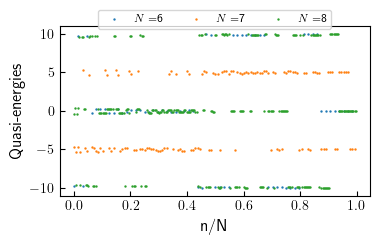

In [20]:
plt.rcParams.update({"figure.figsize": (4, 2.2), "text.usetex": True, "font.size": 12})

T = 2 * np.pi/omega

for i, N in enumerate(Ns):
    #plt.scatter(range(len(data_floquet[i])), data_floquet[i], s = 0.3, label = r'$N=$'+str(N))
    plt.scatter(np.linspace(0, len(data_floquet[i])-1, len(data_floquet[i]))/len(data_floquet[i]), data_floquet[i], s= 0.5, label = r'$N=$'+str(N))
    
plt.xlabel('n/N')
plt.ylabel(r'Quasi-energies')
plt.tick_params(axis='both', which='both', labelsize=10)
plt.tick_params(which='both', direction='in')
plt.legend(frameon=True, fontsize=8, ncol=5, loc='upper center', bbox_to_anchor=(0.5, 1.13))
#plt.xlim(1490, 1500)
#plt.ylim(0.95, 1.02)

#plt.axhline(y = 1, color = 'black', lw = 0.5)
#plt.axhline(y = -0.5, color = 'black', lw = 0.5)

#plt.savefig("ising_freezing_dtc_magnetization.pdf", bbox_inches = 'tight')

plt.show()

### Time evolution of Magnetization

In [1]:
# Basisc square wave: SX-->T1;  flat band --> T2;  T1 + T2 = T
from scipy.special import jn_zeros
from itertools import combinations


def zerodrive(t, args):
    d = args['duty']
    w = args['omega']
    T = 2 * np.pi/w
    sqr = -signal.square(w * t, duty = d)
    if sqr < 0:
        sqr= 0
    return sqr

def onedrive(t, args):
    d = args['duty']
    w = args['omega']
    T = 2 * np.pi/w
    sqr = signal.square(w * t, duty = d)
    if sqr < 0:
        sqr= 0
    return sqr

def drive1(t, args):
    d = args['duty']
    w = args['omega']
    J = args['J']
    T = 2 * np.pi/w
    sqr = J * signal.square(w * t, duty = d)
    return sqr

def drive2(t, args):
    d = args['duty']
    w = args['omega']
    g = args['g']
    T = 2 * np.pi/w
    sqr = g * signal.square(2 * w * t, duty = d)
    return sqr

def drive3(t, args):
    d = args['duty']
    w = args['omega']
    lambda_s = args['lambda_s']
    T = 2 * np.pi/w
    sqr = - lambda_s * signal.square(w * t, duty = d) 
    if sqr < 0:
        sqr= 0
    return sqr


# HAMILTONIAN   

def j_ij(Jvalue, i,j, beta):
    return Jvalue/(np.abs(i-j))**beta
 
def position_hamiltonian(args):
    N  =  args['N']
    er = args['er']
    sx,sy,sz = sigmax(), sigmay(), sigmaz()
    empt = qzero(2**N) + 1j * qzero(2**N)    
    H01, H02, H11, H31 = empt,  empt, empt, empt
    
    for i in range(N-1):
        id = qeye(2**i)    
        dim11 = N-2-i
        id1 = qeye(2**dim11)
        H01 = H01 + Qobj(tensor(id,tensor(sz,tensor(sz,id1))).full())

    for i in range(N):
        id = qeye(2 ** i)    
        dim11 = N-1-i
        id1 = qeye(2 ** dim11)
        H02 = H02 + Qobj(tensor(id,tensor(sx,id1)).full())
        
    for i in range(N):
        id = qeye(2**i)    
        dim11 = N-1-i
        id1 = qeye(2**dim11)
        H11 = H11 + Qobj(tensor(id,tensor(sx,id1)).full()) * (1-er)
        
        
    for i in range(N):
        id = qeye(2**i)    
        dim11 = N-1-i
        id1 = qeye(2**dim11)
        H31 = H31 + Qobj(tensor(id,tensor(sz,id1)).full())

    return H01, H02, H11, H31

# FLOQUET ANALYSIS

def floquet_return_position(args):
    N  =  args['N']
    er = args['er']
    H01, H02, H11, H31 = position_hamiltonian(args)
    H = [[H01, drive1],[H02,drive2],[H11,drive3]]

    T = 2 * np.pi/args['omega']
    f_modes_0, f_energies = floquet_modes(H, T, args)
    return f_energies

# MAGNETIZATION
def magnetization_position(args):      
    N  =  args['N']
    er = args['er']
    H01, H02, H11, H31 = position_hamiltonian(args)
    H = [[H01, drive1],[H02,drive2],[H11,drive3]]

    grket = basis(2**N,0)
    times = args['times']
    data = mesolve(H, grket, times, [], [H31/N], args = args)
    return data.expect

print("Functions defined")

Functions defined


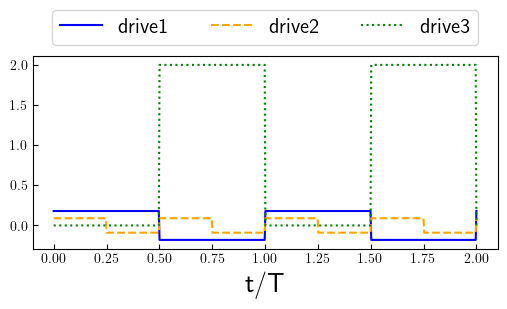

In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.special import jn_zeros


plt.rcParams.update({"figure.figsize": (6, 2.5), "text.usetex": True, "font.size": 20})

w = 4
T = 2 * np.pi/w
h = jn_zeros(0,1)[0] * w/4
times = np.linspace(0, 2*T, 600)
duty = 0.5

J = 0.18
g = J/2

params = {'omega': w, 'duty': duty, 'lambda_s': w/2, 'lambda_0': h, 'omega_0': 0, 'omega_1': 0.5, 'h':h, 'J': J , 'g': g}  

plt.plot(times/T, np.array([drive1(t, params) for t in times]), color = 'blue', label = r'drive1')
plt.plot(times/T, np.array([drive2(t, params) for t in times]), color = 'orange', label = r'drive2', ls= '--')
plt.plot(times/T, np.array([drive3(t, params) for t in times]), color = 'green', label = r'drive3', ls= ':')

plt.tick_params(axis='both', which='both', labelsize=10)
plt.xlabel('t/T')
plt.tick_params(which='both', direction='in')
plt.legend(frameon = True,  fontsize =15, ncol =3, loc = 'center', bbox_to_anchor = (0.5, 1.15))

#plt.ylim(-1.1, 1.6)
#plt.savefig("ising_freezing_dtc_drive.pdf", bbox_inches = 'tight')

plt.show()


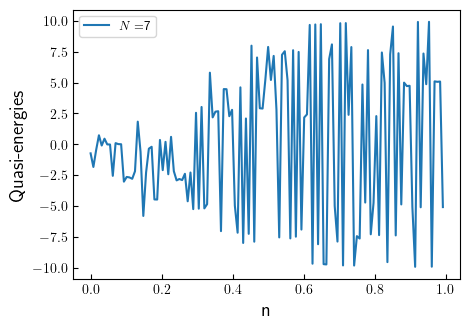

In [3]:
import matplotlib.pyplot as plt
import traceback
import numpy as np
from qutip import *
from scipy import signal
import h5py
from multiprocessing import Pool

Ns = [7]
omega = 20
w = omega
h = jn_zeros(0,1)[0] * w/4
duty = 0.5

lambda_s = w/(4*duty)
J = 10
g = J/2
er = 0.0

T = 2 * np.pi/omega
time_period = 10
times = np.linspace(0, time_period * T, time_period * 50 +1, endpoint = True)

nprocs = len(Ns)
p = Pool(processes = nprocs) 
opts = Options(nsteps=1e4, num_cpus=1, openmp_threads=1)

params = [{'omega':omega,'er':er, 'lambda_s':w/(4*duty),'h':h,\
            'times':times, 'N':N, 'duty':duty,'J':J, 'g':g} for N in Ns]

data_floquet = p.map(floquet_return_position, params)

#-------------------------------------------------------
#       Now Plot the data
#-------------------------------------------------------

plt.rcParams.update({"figure.figsize": (5, 3.5), "text.usetex": True, "font.size": 14})

T = 2 * np.pi/omega

for i, N in enumerate(Ns):
    plt.plot(np.linspace(0, len(data_floquet[i])-1, len(data_floquet[i]))/len(data_floquet[i]), data_floquet[i], label = r'$N=$'+str(N))

plt.xlabel('n')
plt.ylabel(r'Quasi-energies')
plt.tick_params(axis='both', which='both', labelsize=10)
plt.tick_params(which='both', direction='in')
plt.legend(frameon = True,  fontsize =9, ncol = 2)
#plt.xlim(1490, 1500)
#plt.ylim(-0.1, 0.1)

#plt.axhline(y = 1, color = 'black', lw = 0.5)
#plt.axhline(y = -0.5, color = 'black', lw = 0.5)

plt.savefig("impure_flatband_qe.pdf", bbox_inches = 'tight')
plt.show()

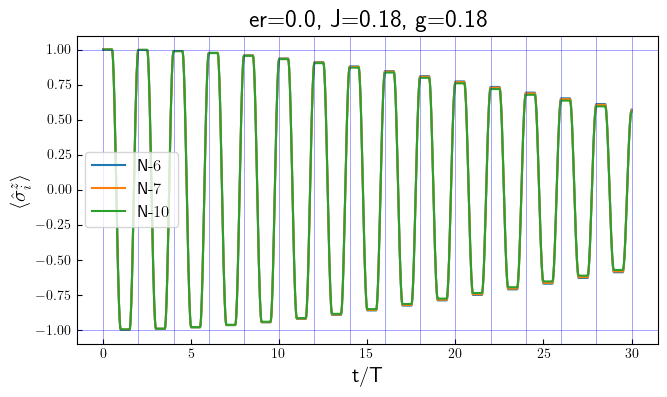

In [11]:
import matplotlib.pyplot as plt
import traceback
import numpy as np
from qutip import *
from scipy import signal
import h5py
from multiprocessing import Pool

plt.rcParams.update({"figure.figsize": (7.5,4), "text.usetex": True, "font.size": 15})

Ns = [6, 7, 10]
omega = 20
w = omega
h = jn_zeros(0,1)[0] * w/4
duty = 0.5

lambda_s = w/(4*duty)
J = 0.18
g = J
er = 0.0

T = 2 * np.pi/omega
time_period = 30
times = np.linspace(0, time_period * T, time_period * 50 +1, endpoint = True)

nprocs = len(Ns)
p = Pool(processes = nprocs) 
opts = Options(nsteps=1e4, num_cpus=1, openmp_threads=1)

params = [{'omega':omega,'er':er, 'lambda_s':w/(4*duty),'h':h,\
            'times':times, 'N':N, 'duty':duty,'J':J, 'g':g} for N in Ns]

data_tfim_p_fb = np.array(p.map(magnetization_position, params))

# DATA PLOTTING

for i, N in enumerate(Ns):
    plt.plot(times/T, data_tfim_p_fb[i][0], label =fr"N-${N}$")

plt.xlabel('t/T')
plt.ylabel(r'$\langle \hat{\sigma}^z_i \rangle$')
plt.title(fr"er={er}, J={J}, g={g}")
plt.tick_params(axis='both', which='both', labelsize=10)
plt.tick_params(which='both', direction='in')
plt.legend(frameon = True,  fontsize =12)
#plt.xlim(1490, 1500)
#plt.ylim(0.99, 1.01)

plt.axhline(y = 1,  color = 'blue', alpha = 0.5, lw = 0.5)
plt.axhline(y = -1, color = 'blue', alpha = 0.5, lw = 0.5)

for i in np.arange(0, int(times[-1]/T)+1, 2):
    plt.axvline(x = i, color = 'blue', alpha = 0.5, lw = 0.5)

plt.savefig(fr"mag_er{er}_J{J}_g{g}.pdf", bbox_inches = 'tight')

plt.show()


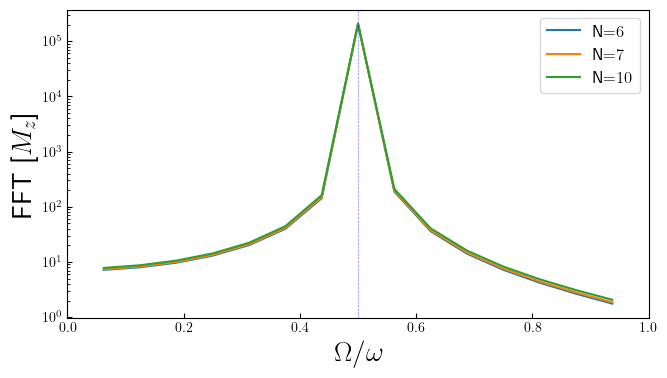

In [31]:
# FFT of each magnetization data
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.signal import find_peaks


plt.rcParams.update({"figure.figsize": (7.5, 4), "text.usetex": True, "font.size": 20})
from scipy.fft import fft, ifft, fftfreq

N = data_tfim_p_fb.shape[1]
T = 2 * np.pi/omega

freq_threshold = 0.01

for i, N in enumerate(Ns):    
    mz = data_tfim_p_fb[i][0]
    frequencies = T * np.fft.fftfreq(mz.size, d = times[-1]/len(times))
    fft_values = np.fft.fft(mz - np.average(mz))            
    mask = (frequencies > freq_threshold) & (frequencies <0.95)
    y = np.abs(fft_values[mask])**2
    x = frequencies[mask]       
    peak_idx, peak_props = find_peaks(y, prominence = 1)
    peak_pos = x[peak_idx]  

    plt.plot(x,y, label = rf"N=${N}$")
plt.xlim(0, 1)
plt.yscale('log')
plt.xlabel(r'$\Omega/\omega$')
plt.ylabel(r'FFT [$M_{z}$]')
plt.tick_params(axis='both', which='both', labelsize=10)
plt.tick_params(which='both', direction='in')
plt.legend(frameon = True,  fontsize =12)

plt.axvline(x = 0.5, color = 'blue', alpha = 0.5, lw = 0.5, ls = '--')  

#plt.savefig("ising_freezing_dtc_fft_magnetization.pdf", bbox_inches = 'tight')
plt.show()

In [50]:
# Basisc square wave: SX-->T1;  flat band --> T2;  T1 + T2 = T
from scipy.special import jn_zeros
from itertools import combinations


def zerodrive(t, args):
    d = args['duty']
    w = args['omega']
    T = 2 * np.pi/w
    sqr = -signal.square(w * t, duty = d)
    if sqr < 0:
        sqr= 0
    return sqr

def onedrive(t, args):
    d = args['duty']
    w = args['omega']
    T = 2 * np.pi/w
    sqr = signal.square(w * t, duty = d)
    if sqr < 0:
        sqr= 0
    return sqr

def drive1(t, args):
    d = args['duty']
    w = args['omega']
    J = args['J']
    T = 2 * np.pi/w
    sqr = J * signal.square(w * t, duty = d)
    return sqr

def drive2(t, args):
    d = args['duty']
    w = args['omega']
    g = args['g']
    T = 2 * np.pi/w
    sqr = g * signal.square(2 * w * t, duty = d)
    return sqr

def drive3(t, args):
    d = args['duty']
    w = args['omega']
    lambda_s = args['lambda_s']
    T = 2 * np.pi/w
    sqr = - lambda_s * signal.square(w * t, duty = d) 
    if sqr < 0:
        sqr= 0
    return sqr


# HAMILTONIAN   

def j_ij(Jvalue, i,j, beta):
    return Jvalue/(np.abs(i-j))**beta
 
def position_hamiltonian(args):
    N  =  args['N']
    er = args['er']
    sx,sy,sz = sigmax(), sigmay(), sigmaz()
    empt = qzero(2**N) + 1j * qzero(2**N)    
    H01, H02, H11, H31 = empt,  empt, empt, empt
    
    for i in range(N-1):
        id = qeye(2**i)    
        dim11 = N-2-i
        id1 = qeye(2**dim11)
        H01 = H01 + Qobj(tensor(id,tensor(sx,tensor(sx,id1))).full())

    for i in range(N):
        id = qeye(2 ** i)    
        dim11 = N-1-i
        id1 = qeye(2 ** dim11)
        H02 = H02 + Qobj(tensor(id,tensor(sz,id1)).full())
        
    for i in range(N):
        id = qeye(2**i)    
        dim11 = N-1-i
        id1 = qeye(2**dim11)
        H11 = H11 + Qobj(tensor(id,tensor(sx,id1)).full()) * (1-er)
        
        
    for i in range(N):
        id = qeye(2**i)    
        dim11 = N-1-i
        id1 = qeye(2**dim11)
        H31 = H31 + Qobj(tensor(id,tensor(sz,id1)).full())

    return H01, H02, H11, H31

# FLOQUET ANALYSIS

def floquet_return_position(args):
    N  =  args['N']
    er = args['er']
    H01, H02, H11, H31 = position_hamiltonian(args)
    H = [[H01, drive1],[H02,drive2],[H11,drive3]]

    T = 2 * np.pi/args['omega']
    f_modes_0, f_energies = floquet_modes(H, T, args)
    return f_energies

# MAGNETIZATION
def magnetization_position(args):      
    N  =  args['N']
    er = args['er']
    H01, H02, H11, H31 = position_hamiltonian(args)
    H = [[H01, drive1],[H02,drive2],[H11,drive3]]

    grket = basis(2**N,0)
    times = args['times']
    data = mesolve(H, grket, times, [], [H31/N], args = args)
    return data.expect

print("Functions defined")

Functions defined


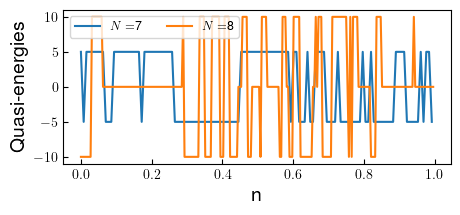

In [51]:
import matplotlib.pyplot as plt
import traceback
import numpy as np
from qutip import *
from scipy import signal
import h5py
from multiprocessing import Pool
plt.rcParams.update({"figure.figsize": (5, 2), "text.usetex": True, "font.size": 14})

Ns = [7, 8]
omega = 20
w = omega
h = jn_zeros(0,1)[0] * w/4
duty = 0.5

lambda_s = w/(4*duty)
J = 0.18
g = J/2
er = 0.0
beta = 0.0

T = 2 * np.pi/omega
time_period = 10
times = np.linspace(0, time_period * T, time_period * 50 +1, endpoint = True)

nprocs = len(Ns)
p = Pool(processes = nprocs) 
opts = Options(nsteps=1e4, num_cpus=1, openmp_threads=1)

params = [{'omega':omega,'er':er, 'lambda_s':w/(4*duty),'h':h,'Jvalue':J,\
            'times':times, 'N':N, 'beta':beta,'duty':duty,'J':J, 'g':g} for N in Ns]

data_floquet = p.map(floquet_return_position, params)

#-------------------------------------------------------
#       Now Plot the data
#-------------------------------------------------------



T = 2 * np.pi/omega

for i, N in enumerate(Ns):
    plt.plot(np.linspace(0, len(data_floquet[i])-1, len(data_floquet[i]))/len(data_floquet[i]), data_floquet[i], label = r'$N=$'+str(N))

plt.xlabel('n')
plt.ylabel(r'Quasi-energies')
plt.tick_params(axis='both', which='both', labelsize=10)
plt.tick_params(which='both', direction='in')
plt.legend(frameon = True,  fontsize =9, ncol = 2)
#plt.xlim(1490, 1500)
#plt.ylim(0.95, 1.02)

#plt.axhline(y = 1, color = 'black', lw = 0.5)
#plt.axhline(y = -0.5, color = 'black', lw = 0.5)

#plt.savefig("ising_freezing_dtc_magnetization.pdf", bbox_inches = 'tight')

plt.show()

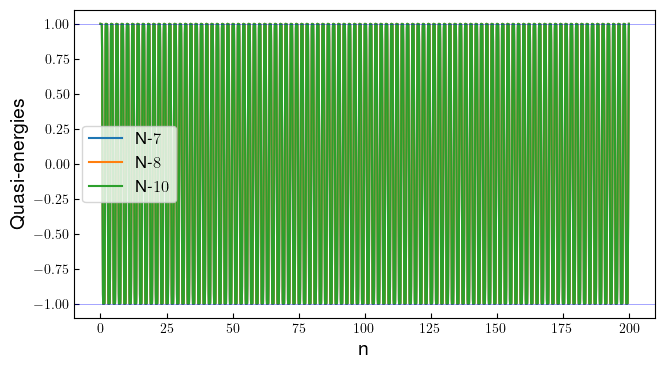

In [52]:
import matplotlib.pyplot as plt
import traceback
import numpy as np
from qutip import *
from scipy import signal
import h5py
from multiprocessing import Pool
plt.rcParams.update({"figure.figsize": (7.5, 4), "text.usetex": True, "font.size": 14})

Ns = [7, 8, 10]
omega = 20
w = omega
h = jn_zeros(0,1)[0] * w/4
duty = 0.5

lambda_s = w/(4*duty)
J = 0.18
g = J/2
er = 0.0
beta = 0.0

T = 2 * np.pi/omega
time_period = 200
times = np.linspace(0, time_period * T, time_period * 50 +1, endpoint = True)

nprocs = len(Ns)
p = Pool(processes = nprocs) 
opts = Options(nsteps=1e4, num_cpus=1, openmp_threads=1)

params = [{'omega':omega,'er':er, 'lambda_s':w/(4*duty),'h':h,'Jvalue':J/5,\
            'times':times, 'N':N, 'beta':beta,'duty':duty,'J':J, 'g':g} for N in Ns]

data_tfim_p_fb = np.array(p.map(magnetization_position, params))

# DATA PLOTTING
for i, N in enumerate(Ns):
    plt.plot(times/T, data_tfim_p_fb[i][0], label =fr"N-${N}$")

plt.xlabel('n')
plt.ylabel(r'Quasi-energies')
plt.tick_params(axis='both', which='both', labelsize=10)
plt.tick_params(which='both', direction='in')
plt.legend(frameon = True,  fontsize =12)
#plt.xlim(1490, 1500)
#plt.ylim(0.99, 1.01)

plt.axhline(y = 1,  color = 'blue', alpha = 0.5, lw = 0.5)
plt.axhline(y = -1, color = 'blue', alpha = 0.5, lw = 0.5)

#for i in np.arange(0, int(times[-1]/T)+1, 2):
#    plt.axvline(x = i, color = 'blue', alpha = 0.5, lw = 0.5)

#plt.savefig("ising_freezing_dtc_magnetization.pdf", bbox_inches = 'tight')

plt.show()

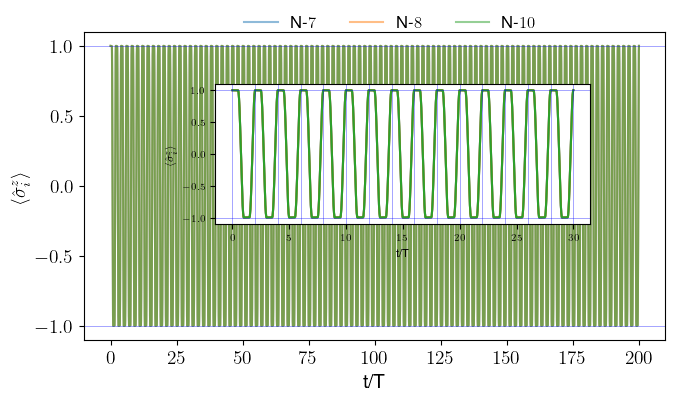

<Figure size 750x400 with 0 Axes>

In [53]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Main plot: up to 30 time periods
main_time_period = 30
main_times = np.linspace(0, main_time_period * T, main_time_period * 50 + 1, endpoint=True)

plt.rcParams.update({"figure.figsize": (7.5, 4), "text.usetex": True, "font.size": 14})

fig, ax1 = plt.subplots(figsize=(7.5, 4))

for i, N in enumerate(Ns):
    #ax1.plot(main_times/T, data_tfim_p_fb[i][0][:len(main_times)], label = fr"N-${N}$")
    ax1.plot(inset_times/T, data_tfim_p_fb[i][0][:len(inset_times)], label=fr"N-${N}$", alpha = 0.5)

ax1.set_xlabel('t/T')
ax1.set_ylabel(r'$\langle \hat{\sigma}^z_i \rangle$')
ax1.legend(frameon=False, fontsize=12, ncol=4, loc='upper left', bbox_to_anchor=(0.25, 1.1))
ax1.axhline(y=1, color='blue', alpha=0.5, lw=0.5)
ax1.axhline(y=-1, color='blue', alpha=0.5, lw=0.5)

# Insert inset plot: up to 200 time periods
inset_time_period = 200
inset_times = np.linspace(0, inset_time_period * T, inset_time_period * 50 + 1, endpoint=True)

# [left, bottom, width, height] in figure coordinates (0-1)
ax2 = fig.add_axes([0.65, 0.65, 0.2, 0.2])

# 4. Plot data in the inset
# You can adjust the position and size of the inset by changing the [left, bottom, width, height] values.
# For example, to increase the distance from the right and top borders, use smaller left and bottom values:
ax2.set_position([0.3, 0.40, 0.5, 0.35])  # [left, bottom, width, height]

for i, N in enumerate(Ns):
    #ax2.plot(inset_times/T, data_tfim_p_fb[i][0][:len(inset_times)], label=fr"N-${N}$", alpha = 0.5)
    ax2.plot(main_times/T, data_tfim_p_fb[i][0][:len(main_times)], label = fr"N-${N}$")

for i in np.arange(0, int(main_times[-1]/T)+1, 2):
    ax2.axvline(x=i, color='blue', alpha=0.5, lw=0.5)

ax2.axhline(y=1, color='blue', alpha=0.5, lw=0.5)
ax2.axhline(y=-1, color='blue', alpha=0.5, lw=0.5)

#ax2.set_title("Inset: up to 200 T", fontsize=10)
ax2.set_xlabel('t/T', fontsize=8)
ax2.set_ylabel(r'$\langle \hat{\sigma}^z_i \rangle$', fontsize=8)
ax2.tick_params(axis='both', which='both', labelsize=7)

# 5. Display the plot
plt.show()

plt.savefig(fr"DTC_mag_inset_er={er}_J={J}_g={g}.pdf", bbox_inches='tight')
plt.show()

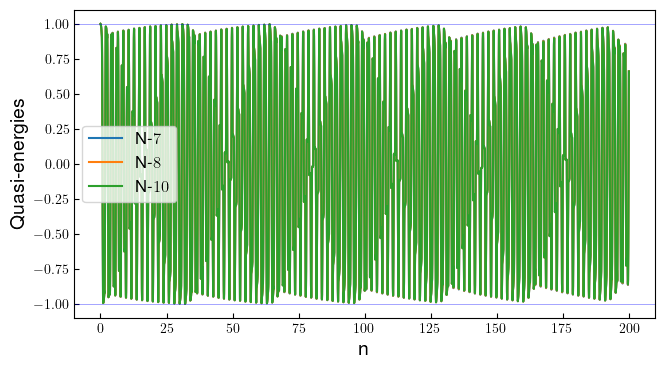

In [56]:
import matplotlib.pyplot as plt
import traceback
import numpy as np
from qutip import *
from scipy import signal
import h5py
from multiprocessing import Pool
plt.rcParams.update({"figure.figsize": (7.5, 4), "text.usetex": True, "font.size": 14})

Ns = [7, 8, 10]
omega = 20
w = omega
h = jn_zeros(0,1)[0] * w/4
duty = 0.5

lambda_s = w/(4*duty)
J = 1
g = J
er = 0.03
beta = 0.0

T = 2 * np.pi/omega
time_period = 200
times = np.linspace(0, time_period * T, time_period * 50 +1, endpoint = True)

nprocs = len(Ns)
p = Pool(processes = nprocs) 
opts = Options(nsteps=1e4, num_cpus=1, openmp_threads=1)

params = [{'omega':omega,'er':er, 'lambda_s':w/(4*duty),'h':h,'Jvalue':J/5,\
            'times':times, 'N':N, 'beta':beta,'duty':duty,'J':J, 'g':g} for N in Ns]

data_tfim_p_fb = np.array(p.map(magnetization_position, params))

# DATA PLOTTING
for i, N in enumerate(Ns):
    plt.plot(times/T, data_tfim_p_fb[i][0], label =fr"N-${N}$")

plt.xlabel('n')
plt.ylabel(r'Quasi-energies')
plt.tick_params(axis='both', which='both', labelsize=10)
plt.tick_params(which='both', direction='in')
plt.legend(frameon = True,  fontsize =12)
#plt.xlim(1490, 1500)
#plt.ylim(0.99, 1.01)

plt.axhline(y = 1,  color = 'blue', alpha = 0.5, lw = 0.5)
plt.axhline(y = -1, color = 'blue', alpha = 0.5, lw = 0.5)

#for i in np.arange(0, int(times[-1]/T)+1, 2):
#    plt.axvline(x = i, color = 'blue', alpha = 0.5, lw = 0.5)

#plt.savefig("ising_freezing_dtc_magnetization.pdf", bbox_inches = 'tight')

plt.show()

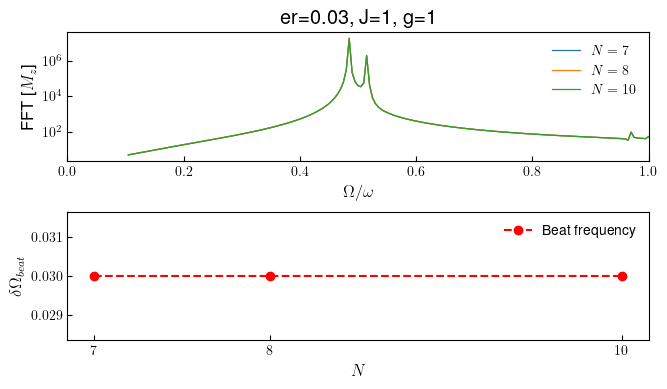

In [57]:
# Find out beats from drive functions for each N from data_tfim_p_fb datafile


from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.signal import find_peaks

plt.rcParams.update({"figure.figsize": (7.5,4),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 12,"font.sans-serif": ["Helvetica"]})

fig, axs = plt.subplots(2,1)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

#-------  FFT   ----------------------------------------------------------------       
freq_threshold = 0.1
btfr, ers = [], [] 


for i, N in enumerate(Ns):
    mz  = data_tfim_p_fb[i][0]

   
    frequencies = T * np.fft.fftfreq(mz.size, d = times[-1]/len(times))
    fft_values = np.fft.fft(mz - np.average(mz))
    
    #mask = frequencies > freq_threshold
    mask = (frequencies > freq_threshold) & (frequencies <1.0)
    y = np.abs(fft_values[mask])**2
    x = frequencies[mask]

    line, = axs[0].plot(x, y, linewidth=0.9,label = fr'$N={N}$')            

    #-------  Find FFT Peaks and Beats frequencies   --------------------------
    
    peak_idx, peak_props = find_peaks(y, prominence = 5, distance = None, height = 1.0e2)
    #peak_idx, peak_props = find_peaks(y, prominence = 1)
    peak_pos = x[peak_idx]                     
    
    peaks_before = peak_pos[peak_pos < 0.5]
    before_proms = peak_props['prominences'][peak_pos < 0.5]
    most_prominent_idx = np.argmax(before_proms)
    prominent_freq_before = peaks_before[most_prominent_idx]

    peaks_after = peak_pos[peak_pos > 0.5]
    after_proms = peak_props['prominences'][peak_pos > 0.5]
    most_prominent_idx = np.argmax(after_proms)
    prominent_freq_after = peaks_after[most_prominent_idx]
    
    beat_freq = np.abs(prominent_freq_after-prominent_freq_before) 
    btfr.append(beat_freq)

axs[1].plot(Ns, btfr, 'o--', color = 'red', label = 'Beat frequency')
axs[1].set_xlabel(r'$N$')
axs[1].set_ylabel(r'$\delta\Omega_{beat}$')
axs[1].set_xticks(Ns)
axs[1].legend(frameon = False, fontsize = 10)
axs[1].tick_params(axis='both', which='both', labelsize=10)
axs[1].tick_params(which='both', direction='in')

axs[0].set_xlabel(r'$\Omega/\omega$')
axs[0].set_ylabel(r'FFT [$M_{z}$]')
axs[0].set_xlim(0, 1)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', which='both', labelsize=10)
axs[0].tick_params(which='both', direction='in')
axs[0].legend(frameon = False, fontsize = 10)
axs[0].set_title(fr"er={er}, J={J}, g={g}")

plt.savefig(fr"DTC_mag_inset_er={er}_J={J}_g={g}.pdf", bbox_inches='tight')

plt.show()